In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Life_Expectancy_Fixed_Updated_Analysis_Ready.csv")
df

,Country,Region,Year,Life_expectancy,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,Afghanistan,Asia,2000,55.8,90.5,129.2,310.8305,0.020,62,12,21.7,24,24,0.02,148,20.78,2.3,2.5,2.2
1,Afghanistan,Asia,2014,63.0,55.2,73.6,231.9780,0.010,62,44,23.2,62,62,0.03,565,33.37,17.5,17.5,3.5
2,Afghanistan,Asia,2013,62.5,57.3,76.9,236.2210,0.010,64,38,23.0,64,64,0.03,569,32.27,17.7,17.7,3.5
3,Afghanistan,Asia,2008,59.9,69.2,95.7,259.8060,0.028,64,23,22.5,64,64,0.02,399,27.72,18.8,18.9,3.0
4,Afghanistan,Asia,2006,58.8,74.6,104.1,271.4905,0.026,64,18,22.3,58,58,0.02,354,26.43,19.2,19.3,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Zimbabwe,Africa,2006,43.9,53.4,95.0,653.9180,2.350,68,64,23.5,71,70,8.78,1091,12.16,8.6,8.6,6.8
2860,Zimbabwe,Africa,2002,43.5,50.7,92.6,719.3605,2.390,73,64,23.3,73,71,11.04,1559,11.95,1.2,1.3,6.9
2861,Zimbabwe,Africa,2005,43.2,51.7,93.1,670.2790,2.170,65,64,23.5,69,68,9.20,1137,12.08,9.0,9.0,6.8
2862,Zimbabwe,Africa,2007,44.9,54.6,95.7,637.5580,2.260,72,64,23.5,73,73,8.29,1042,12.26,8.2,8.2,7.0


In [2]:
#Averaging the numeric data
df_country_mean = df.groupby("Country", as_index=False).mean(numeric_only=True)

#Remove non-numeric columns to perform factor analysis
df_factors = df_country_mean.select_dtypes(include=['float64','int64'])

df_factors = df_factors.drop(['Year','Life_expectancy'], axis=1)
df_factors

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000
1,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375
2,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375
3,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625
4,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750
175,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000
176,52.44375,69.57500,239.653937,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500
177,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750


In [3]:
# pip install factor_analyzer <- Uncomment if I need to re-install

#standardizing the data
scaler = StandardScaler()
df_factors_scaled = scaler.fit_transform(df_factors)
#df_factors_scaled
#df_factors
df_factors = pd.DataFrame(df_factors_scaled, columns=df_factors.columns)


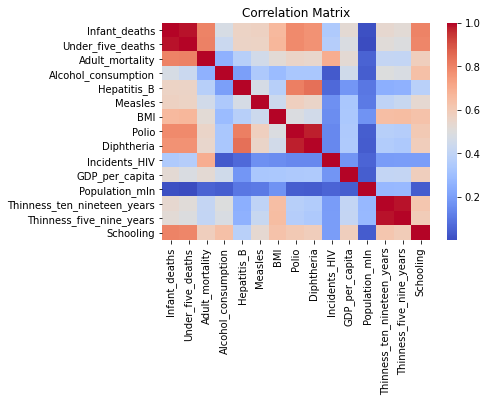

KMO per variable:
[0.85993564 0.84246052 0.82407744 0.87212463 0.91217332 0.92948885
 0.92788798 0.8540277  0.81973257 0.58244134 0.79962094 0.77994752
 0.76419065 0.75661694 0.91961028]

Overall KMO: 0.8407048085400696


/Users/hola2005/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [4]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import seaborn as sns

#Correlation Matrix as a heatmap
corr_matrix = df_factors.corr().abs()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

#Getting the KMO Statistic
kmo_per_variable, kmo_overall = calculate_kmo(df_factors)
print(f"KMO per variable:\n{kmo_per_variable}")
print(f"\nOverall KMO: {kmo_overall}")


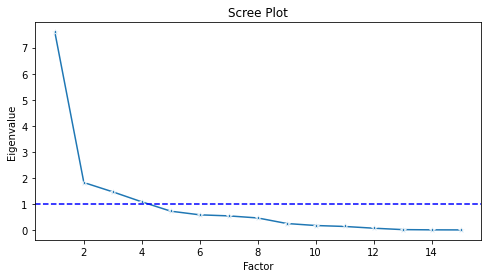

Eigenvalues: [7.58902601 1.82710484 1.46864893 1.08580831 0.72795061 0.58817986
 0.54795481 0.46860072 0.25575881 0.17853866 0.14248764 0.07575419
 0.02141129 0.01279015 0.00998516]


In [15]:
#With a KMO over 0.6 proceed with Factor Analysis
Factor_df = FactorAnalyzer(n_factors=2, rotation='varimax')
Factor_df.fit(df_factors)

#Checking Eigenvalues to decide the correct amount of factors to use 
evalue, v= Factor_df.get_eigenvalues()
plt.figure(figsize=(8,4))
sns.lineplot(x=range(1, len(evalue)+1), y=evalue, marker='*')
plt.axhline(1, color='blue', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()
print('Eigenvalues:',evalue)


In [16]:
# See Factor Loadings
loadings = pd.DataFrame(Factor_df.loadings_, index=df_factors.columns)
print("Factor Loadings:\n", loadings.round(3))
explained_variance, proportional_variance, cumulative_variance = Factor_df.get_factor_variance()
print("Cumulative Variance:",cumulative_variance )

Factor Loadings:
                                  0      1
Infant_deaths               -0.853  0.422
Under_five_deaths           -0.859  0.390
Adult_mortality             -0.659  0.349
Alcohol_consumption          0.304 -0.479
Hepatitis_B                  0.740 -0.003
Measles                      0.562 -0.304
BMI                          0.470 -0.565
Polio                        0.935 -0.102
Diphtheria                   0.933 -0.076
Incidents_HIV               -0.257  0.172
GDP_per_capita               0.373 -0.429
Population_mln               0.035  0.234
Thinness_ten_nineteen_years -0.238  0.910
Thinness_five_nine_years    -0.233  0.903
Schooling                    0.611 -0.588
Cumulative Variance: [0.36742148 0.59193122]


In [7]:
#fa =Factor_df

factor_scores = pd.DataFrame(Factor_df.transform(df_factors), columns=[f'Factor{i+1}' for i in range(Factor_df.n_factors)])
factor_scores["Country"] = df_country_mean["Country"].values

factor_scores

,Factor1,Factor2,Country
0,-1.447596,1.962548,Afghanistan
1,0.608838,-0.520421,Albania
2,0.459540,0.427473,Algeria
3,-2.905267,-0.595100,Angola
4,0.814803,-0.097914,Antigua and Barbuda
...,...,...,...
174,-0.396110,-1.134063,"Venezuela, RB"
175,1.091074,2.353131,Vietnam
176,-0.294641,1.957779,"Yemen, Rep."
177,-0.715003,0.545303,Zambia


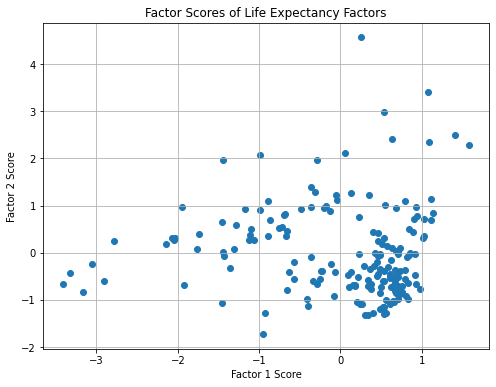

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(factor_scores['Factor1'], factor_scores['Factor2'])
plt.xlabel('Factor 1 Score')
plt.ylabel('Factor 2 Score')
plt.title('Factor Scores of Life Expectancy Factors')
plt.grid(True)
plt.show()


In [26]:
#Doing a Multiple Linear Regresion for Life Expectancy
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

y = df_country_mean['Life_expectancy']
x_reg = factor_scores[['Factor1', 'Factor2']]

reg_model = LinearRegression().fit(x_reg, y)
print('R-Squared:', reg_model.score(x_reg, y))
print('Coefficients:', reg_model.coef_)
print('Intercept:', reg_model.intercept_)

X2 = sm.add_constant(x_reg)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

R-Squared: 0.7800918581593053
Coefficients: [ 7.16889424 -3.92826109]
Intercept: 68.85607541899444
                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           1.31e-58
Time:                        11:20:37   Log-Likelihood:                -515.13
No. Observations:                 179   AIC:                             1036.
Df Residuals:                     176   BIC:                             1046.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [ ]:
#0.78 score is good social sciences score